## Classification Algorithms

- KNN classifier
- Decisioin Tree Classifier
- Naive Bayes Classifier

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

## Discover and visualise the data

In [2]:
# read data from csv file
df = pd.read_csv("/Users/viventan/Downloads/Steel_industry_data.csv")

#Data Preprocessing
df = df.iloc[:,[1,2,3,4,5,6,7,10]]

# display the first 5 rows of data
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Light_Load


In [3]:
# check the shape of the dataframe
df.shape

(35040, 8)

#### Findings:

(1) Based on the Pandas .shape property, it shows this dataframe contains 35040 rows and 8 columns.

In [4]:
# display all columns and their data types 
# and check whether each column contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.1+ MB


In [5]:
# view some basic statistical details of this dataframe
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [6]:
#  returns the correlation matrix of the dataframe
df.corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


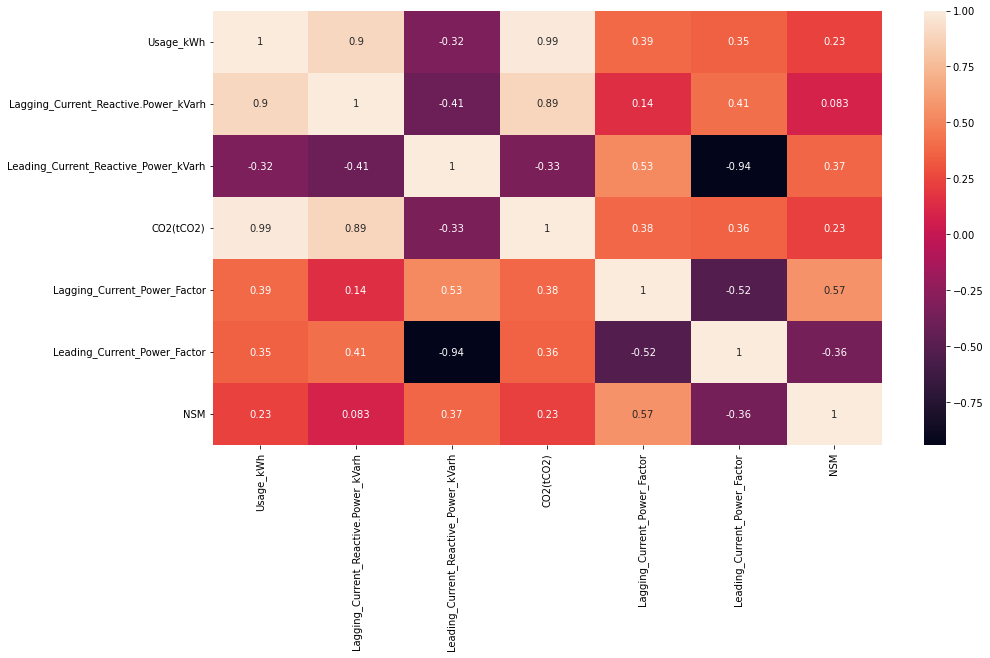

In [7]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(15,8))

# using heapmap to plot
sns.heatmap(df.corr(), annot=True)

# show the plot
plt.show()

In [8]:
# show the tota number of each load types in this dataframe
df.groupby('Load_Type').size()

Load_Type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
dtype: int64

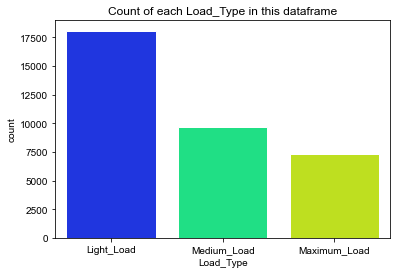

In [9]:
# visualize the count of each 'Load_Type' in this dataframe
plt.title('Count of each Load_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=df['Load_Type'], palette = 'gist_rainbow_r')

plt.show()

#### Findings:

(1) The most number of count of Load Type is Ligh_Load. Then, second more count of Load_Type is Medium_Load. The informations show that Light_Load is the most common load_type.

(2) The least number of count of Load Type is Maximum_Load which is less appear.

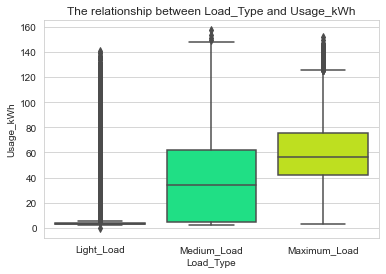

In [10]:
# Visualize the relationship between load_type and usage_kWh
plt.title('The relationship between Load_Type and Usage_kWh')
sns.boxplot(data=df, x='Load_Type', y='Usage_kWh', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Light_load contains a outlier far from its maximun value over 140.

(2) Maximum_load is in the highest usage_kwh which median falls at 58. Also, it contains upper outlier which falls between 125 and 157.


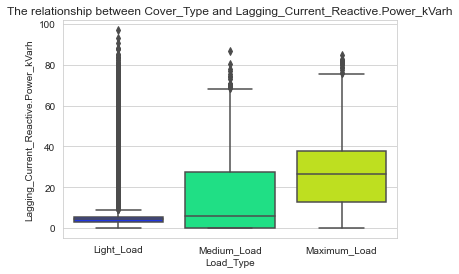

In [11]:
# Visualize the relationship between Load_type and Lagging_Current_Reactive.Power_kVarh
plt.title('The relationship between Cover_Type and Lagging_Current_Reactive.Power_kVarh')
sns.boxplot(data=df, x='Load_Type', y='Lagging_Current_Reactive.Power_kVarh', palette='gist_rainbow_r')

plt.show()

#### Findings:

Light_load contains an extreme outlier far from its maximun value over 100.

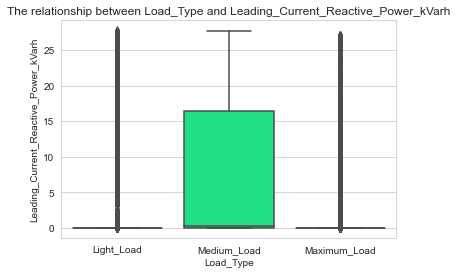

In [12]:
# Visualize the relationship between load_type and Leading_Current_Reactive_Power_kVarh
plt.title('The relationship between Load_Type and Leading_Current_Reactive_Power_kVarh')
sns.boxplot(data=df, x='Load_Type', y='Leading_Current_Reactive_Power_kVarh', palette='gist_rainbow_r')

plt.show()

#### Findings:

Light_load and Maximum_Load both contains a extreme outlier far from its maximun value over 25.


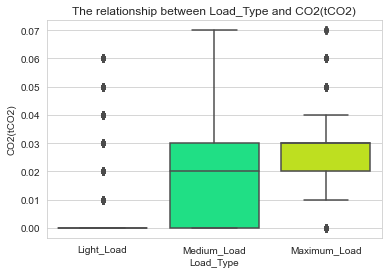

In [13]:
# Visualize the relationship between load_type and CO2(tCO2)
plt.title('The relationship between Load_Type and CO2(tCO2)')
sns.boxplot(data=df, x='Load_Type', y='CO2(tCO2)', palette='gist_rainbow_r')

plt.show()

#### Findings:

As above boxplots, Ligh_Load and Maixmum_load types both has a large outlier far from its maximun value.

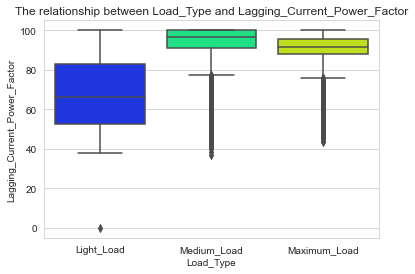

In [14]:
# Visualize the relationship between load_type and Lagging_Current_Power_Factor
plt.title('The relationship between Load_Type and Lagging_Current_Power_Factor')
sns.boxplot(data=df, x='Load_Type', y='Lagging_Current_Power_Factor', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) The median of light_load is at 68 and there is no outliers.

(2) Medium_Load has the most outliers which compare with Maximum_Load Types.


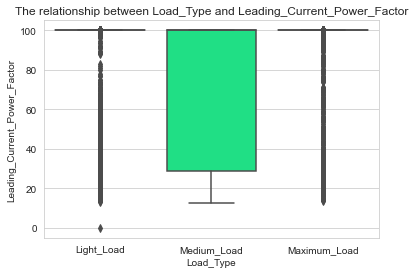

In [15]:
# Visualize the relationship between load_type and CO2(tCO2)
plt.title('The relationship between Load_Type and Leading_Current_Power_Factor')
sns.boxplot(data=df, x='Load_Type', y='Leading_Current_Power_Factor', palette='gist_rainbow_r')

plt.show()

#### Findings:

As above boxplots, Ligh_Load and Maximum_Load Types has a extreme outlier far from its maximum value.

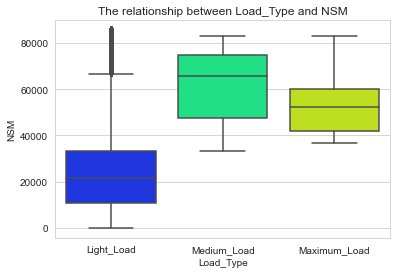

In [16]:
# Visualize the relationship between load_type and CO2(tCO2)
plt.title('The relationship between Load_Type and NSM')
sns.boxplot(data=df, x='Load_Type', y='NSM', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Medium_Load and Maximum_Load do not contains any upper and lower outliers.

(2) Light_Load has a upper outlier wchih over 80000.


### Prepare the data for machine learning algorithms

### We first check if the dataset consist of any missing values

In [17]:
# Check any missing data for each columns
print(df.isnull().values.any())

False


#### Findings:

(1) It gives a False rusult which means that this dataframe does not consist any null values.

In [18]:
# seperate the dataset as feature variables and response variable and store them to X and y variables
X = df.drop('Load_Type', axis=1)
y = df['Load_Type']

# use StratifiedShuffleSplit to split the data 
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=42)
sss.get_n_splits(X,y)

# using for loop to do the splits
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
#double check the size of the dataframe     
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

# using StandardScalar to help us impore the accuracy of the prediction model
scalar = StandardScaler()

# fit and transform the train data
X_train = scalar.fit_transform(X_train)

# transform the test data
X_test = scalar.transform(X_test)

(28032, 7) (7008, 7)
(28032,) (7008,)


#### Findings:

(1) After we used StratifiedShuffleSplit to split the data, now the amount of training data becomes 28032 and the amount of testing data becomes 7008.

## 3 Clssification Models

### (1) KNN Classifier

In [19]:
# instantiate the KNN Classifier() model
knn = KNeighborsClassifier(n_neighbors=4)

# fit the model with X_train and y_train
knn.fit(X_train, y_train)

# make prediction with X_test
y_pred = knn.predict(X_test)

# check our models performance
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.865439497716895


In [20]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = knn.predict(X_train)

# check our models performance
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred))

Accuracy:  0.9147759703196348


#### Findings:

(1) When I set the parameter for the KNN Classifier as (n_neighbors=4) which do a prediction on the testing data and it gives a accuracy 86.54%. When using this model to predict training set data, it gives a 91.48%. Both accuracy only have 4.94% diffence which is not much diffences so it does not occur overfitting issue.

### Tuning the KNN Classifier model

In [21]:
#Create new KNN object
knn_2 = KNeighborsClassifier()

# set the hyperparameters for the gridsearchcv to choose the best one
knn_param = {
             'n_neighbors': [7,9,11],
             'leaf_size': [5,7,9],
             'p': [1,2]
            }

# instantiate the gridsearchcv to get the hyperparameter
knn_gscv = GridSearchCV(estimator=knn_2, param_grid=knn_param, cv=5, n_jobs=-1)

# fit the model with X_train and y_train
knn_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(knn_gscv.best_params_)

# print out the result
print(knn_gscv.best_score_)

{'leaf_size': 5, 'n_neighbors': 7, 'p': 1}
0.8670091301321083


In [22]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = knn_gscv.predict(X_train)

# check our models performance
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred))

Accuracy:  0.9044663242009132


#### Findings:

After tuning the model:
(1) First, we can see that the accuracy becomes 86.70% which compare with the accuracy 86.54% (without tuning) has an improvement of 0.16%.

(2) Next, the tuning model do a prediction of the testing set data is 86.70% and when predict the training data which get a result of 90.45%. It has only a 3.75% differences which does not occur the overfitting issue.

(3) Since I set the n_neighbors = 4 when without tuning the model and it gives us 86.54%. However, when tuning the model, I set the n_neighbors in range of [7,9,11] and it chose 7 which increase the accuracy to 86.70%. However, if we do not limit n_neighbors which would occur a overfitting situation. Therefore, we need to try out different values of the n_neighbors to get the optimum result and avoid the overfitting.

(4) Furthermore, I set the parameter leaf_size in a range of [5,7,9] and the gridsearchcv chose to use 5 as the leaf_size which give a better accuracy also.

### Decision Tree

In [23]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5,random_state=42)

# Train Decision Tree Classifer
dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct? 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8115011415525114


In [24]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dt.predict(X_train)

# check our models performance
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.8091466894977168


#### Findings:

When I set the parameter for the Decision Tree Classifier as (criterion="entropy", max_depth=5, random_state=42) which do a prediction on the testing data and it gives a accuracy 81.15%. When using this model to predict training set data, it gives a 80.91%. Both accuracy only have 0.24% differences which is not much differences and we can say that the model does not occur overfitting issue so that the model is good for predicting both training and testing data.

### Tuning the Decisioin Tree Classifier

In [25]:
# tuning the Decision Tree model

# instantiate the DecisionTreeClassifier() model
dt2 = DecisionTreeClassifier(random_state=42)

# set the hyperparameters for the gridsearchcv to choose the best one
dt_param = { 
              "criterion": ["gini", "entropy"],
              "max_depth": [10, 13, 17],
              "min_samples_leaf": [1, 2, 3]
             }

# using gridsearchcv to get the best hyperparameter
dt_gscv = GridSearchCV(estimator=dt2, param_grid=dt_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
dt_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(dt_gscv.best_params_)

# print out the result
print(dt_gscv.best_score_)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 3}
0.8863441780821918


In [26]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dt_gscv.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

0.9230522260273972


#### Findings:

After tuning the model:

(1) First, we can see that the accuracy becomes 88.63% which compare with the accuracy 81.15% (without tuning) has a significant improvement of 7.48%.

(2) Next, the tuning model do a prediction of the testing set data is 88.63% and when predict the training data which get a result of 92.31%. It has only a 3.68% differences which does not occur the overfitting issue so that the model is good for predicting both training and testing data.

(3) On the other hand, we notice that in the parameter criteria the gridsearchcv chose 'gini' to be the hyperparameter. 

(4) Besides that, we can see that the max_depth in Decision Tree Classifier has a huge impact. Since I set the max_depth = 5 when without tuning the model and it gives us 81.15%. However, when tuning the model, I set the max_depth in a range [10, 13, 17] and it chose 13 which increase the accuracy to 88.63%. Therefore, we can conclude that the more number splits that each decision tree is allowed to make which get more information about the data. However, if we do not limit the max_depth of the tree which would occur a overfitting situation. Therefore, we need to try out different values of the max_depth to get the optimum result and avoid the overfitting.

(5) Furthermore, I set the parameter min_samples_leaf in a range of [1, 2, 3] and the gridsearchcv chose to use 3 as the min_samples_leaf which give a better accuracy also.

### (3) Naive Bayes Classifier

In [27]:
# instantiate the GaussianNB() model
# testing accurracy 
nbc = GaussianNB(var_smoothing=3e-9)

# fit the model with X_train and y_train
nbc.fit(X_train, y_train)

# make prediction with X_test
y_pred = nbc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

0.6882134703196348


In [28]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

0.69099600456621


#### Findings :

When I set the parameter for the GaussianNB as (var_smoothing=3e-9) which do a prediction on the testing data and it gives a accuracy 68.82%. When using this model to predict training set data, it gives a 69.10%. Both accuracy only have 0.28% differences which is not much differences and we can say that the model does not occur overfitting issue so that the model is good for predicting both training and testing data.

### Tuning the Naive Bayes Classifier

In [29]:
#Tune the Naives Bayes Classifier
# instantiate the GaussianNB() model
nbc2 = GaussianNB()

# set the hyperparameters for the gridsearchcv to choose the best one
# use var_smoothing as the hyperparameter
params = {'var_smoothing': np.logspace(0,-9, num=100)}

# using gridsearchcv to get the best hyperparameter
nbc2_gscv = GridSearchCV(estimator=nbc2, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy') 

# fit the model with X_train and y_train
nbc2_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(nbc2_gscv.best_params_)

# print out the result
print(nbc2_gscv.best_score_)

{'var_smoothing': 0.001873817422860383}
0.6908533105022832


In [30]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc2_gscv.predict(X_train)

# check our models performance
print(accuracy_score(y_train, y_pred))

0.6908533105022832


#### Findings： 

After tuning the model:

(1) First, we can see that the accuracy becomes 69.09% which compare with the accuracy 68.82% (without tuning) has a improvement of 0.28%.

(2) Next, the tuning model do a prediction of the testing set data is 69.09% and when predict the training data which get a same result of 69.09%. We can say that the model does not occur overfitting issue so that the model is good for predicting both training and testing data.

(3) The gridsearchcv chose 0.0019 as the best value for the model which give a better accuracy also.

### Accuracy before tuning the model

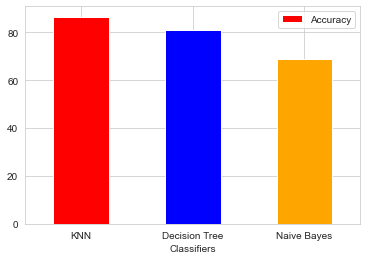

In [33]:
cdf = pd.DataFrame({'Classifiers':['KNN', 'Decision Tree', 'Naive Bayes'], 'Accuracy':[86.54, 81.15, 68.82]})
ax = cdf.plot.bar(x='Classifiers', y='Accuracy', rot=0, color = ['Red', 'Blue', 'Orange'])

### Accuracy after tuning the model

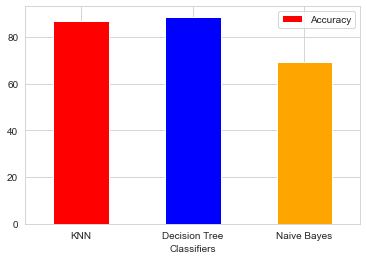

In [34]:
cdf = pd.DataFrame({'Classifiers':['KNN', 'Decision Tree', 'Naive Bayes'], 'Accuracy':[86.70, 88.63, 69.09]})
ax = cdf.plot.bar(x='Classifiers', y='Accuracy', rot=0, color = ['Red', 'Blue', 'Orange']) 

## Comparing the accuracies of all 3 Classifiers

#### Finding of comparing these 3 classification models above:
    
In this task, we have used KNN Classifier model, Decisioin Tree Classifier model and Naive Bayes Classifier model to solve the classification problem.

Among these 3 models, KNN classifier model and Decisioin Tree Classifier model work quite well in this task. KNN classifier model gets 86.54%% and 86.70% before and after tuning the models.For Decision Tree classifier model gets  81.15% and 88.63% before and after tuning the model.

Besides that, these 3 models do not have any underfitting and overfitting problems as I have showed above.

Howver, Naive Bayes Classifier model gives a poor result in solving the classification problem of this task even after tuning the model.



## User-Defined Transform functionality

In [35]:
# define a class to generate a user-defined-transform function
class UserDefinedTransform(BaseEstimator, TransformerMixin):
    # initialize the constructor
    def __init__(self, nsm_lvl=True):
        self.nsm_lvl = nsm_lvl
    
    # define a fit function
    def fit(self, X, y=None):
        return self 
    
    # define a transform function 
    def transform(self, X, y=None):
        # using if else statement to take different actions
        if self.nsm_lvl:
            
            # divide into the different NSM range and insert them into the columns called NSM_Group
            df['NSM_Level'] = pd.cut(df['NSM'], 3, precision=0, labels=['1', '2', '3'])
            
            # insert the column NSM_Group to the right position
            nsm_lvl = df.pop('NSM_Level')
            df.insert(7, 'NSM_Level', nsm_lvl)
            
            # retrun the result
            return np.c_[X, nsm_lvl]
        else:
            # alert the user if got any error to create a new feature
            return print("Please check the values of 'NSM'")

#### Findings:

(1) We generate a new feature called 'NSM_Level'.

(2) The new feature 'NSM_Level' has categorize the NSM values into 3 catrgories which has 1, 2 and 3 so that we can based on this new feature to see the NSM belong to low, median or high. But in our case, we use number instead of string to label the category.

In [36]:
# show the original X.shape
X.shape

(35040, 7)

Findings:

(1) Before transform the new feature ('NSM_Level'), X contains 35040 rows and 7 columns.

In [37]:
# create the class object and transfrom the new feature then show the shape of dataframe which excluding the target column
attr_adder = UserDefinedTransform(nsm_lvl=True)
attr_adder.transform(X).shape

(35040, 8)

#### Findings:

(1) After transform the new feature ('NSM_Level'), X contains 35040 rows and 8 columns.

In [38]:
# display the new feature 'NSM_Level' in the dataframe
df['NSM_Level']

0        1
1        1
2        1
3        1
4        1
        ..
35035    3
35036    3
35037    3
35038    3
35039    1
Name: NSM_Level, Length: 35040, dtype: category
Categories (3, object): ['1' < '2' < '3']

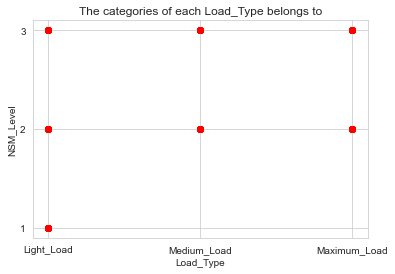

In [39]:
# plot out the graph to see the categories of each Load_Type belongs to
plt.scatter(df['Load_Type'], df['NSM_Level'], c='red')

# set the graph title
plt.title('The categories of each Load_Type belongs to')

# set the xlabel and ylabel
plt.xlabel('Load_Type')
plt.ylabel('NSM_Level')

# show the graph
plt.show()

#### Findings:

(1) Based on the graph above, we can see that most of the Load Types is in NSM_Level 2 and 3.

(2) Next, we notice that only Light_Load Type have in NSM_Level 3. 